<a href="https://colab.research.google.com/github/andreluizcastilho/colab/blob/main/merge_%26_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
tabela_1 = pd.DataFrame({
'Nome':['João', 'João', 'Pedro' , 'Caio'], 
'Telefone': ['12121', '343434', '565656', '787878'], 
'Carros': ['azul', 'preto', 'verde' , 'amarelo']})

In [4]:
tabela_1

,Nome,Telefone,Carros
0,João,12121,azul
1,João,343434,preto
2,Pedro,565656,verde
3,Caio,787878,amarelo


In [5]:
tabela_2 = pd.DataFrame({
'Nome':['João', 'Marcelo', 'Thiago' , 'Caio'],  
'Irmãos': ['1', '3', '2' , '2']})

In [6]:
tabela_2

,Nome,Irmãos
0,João,1
1,Marcelo,3
2,Thiago,2
3,Caio,2


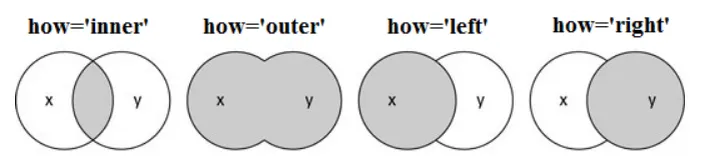

# *******  Merge()  *******

# Caso queiramos a interseção exata entre as tabelas:  how = ‘inner’

In [9]:
m = pd.merge(tabela_1, tabela_2, how = 'inner', on = 'Nome')

# Obtivemos a interseção entre as duas tabelas. Somente os valores na coluna “Nome” que existem em ambas tabelas aparecem no nosso resultado.

In [10]:
m

,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Caio,787878,amarelo,2


# Caso queiramos todas as informações, de ambas tabelas, fazemos um merge “outer”: how = ‘outer’

In [12]:
m = pd.merge(tabela_1, tabela_2, how = 'outer')
m

# Perceba que ‘Pedro” não possui dados para “Irmãos”. E “Marcelo” e “Thiago” não possuem dados para “Telefone” e “Carros”. 
# Volte nas tabelas 1 e 2 veja que esse é exatamente o resultado esperado se quisermos todas as informações.

,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Pedro,565656,verde,NaN
3,Caio,787878,amarelo,2
4,Marcelo,NaN,NaN,3
5,Thiago,NaN,NaN,2


In [51]:
# Mergear pelo index
print('=============== Merge pelo index ==============')
a = tabela_1.merge(tabela_2, right_index=True, left_index=True, how='outer')
display(a)

print('===================================================================================')

print('=============== Com Sufixo ==============')
a2 = tabela_1.merge(tabela_2, right_index=True, left_index=True, how='outer', suffixes = ['__suf_1', '__suf_2'])
display(a2)

print('===================================================================================')

print('=============== Com Validate ==============')
a2 = tabela_1.merge(tabela_2, right_on='Nome', left_on='Nome', how='outer', validate = 'm:1')
display(a2)

print('===================================================================================')

print('=============== Merge pela coluna ==============')
b = tabela_1.merge(tabela_2, right_on='Nome', left_on='Nome', how='outer')
display(b)

print('===================================================================================')

print('=============== Com indicador ==============')
b2 = tabela_1.merge(tabela_2, right_on='Nome', left_on='Nome', how='outer', indicator=True)
display(b2)

=============== Merge pelo index ==============


,Nome_x,Telefone,Carros,Nome_y,Irmãos
0,João,12121,azul,João,1
1,João,343434,preto,Marcelo,3
2,Pedro,565656,verde,Thiago,2
3,Caio,787878,amarelo,Caio,2


=============== Com Sufixo ==============


,Nome__suf_1,Telefone,Carros,Nome__suf_2,Irmãos
0,João,12121,azul,João,1
1,João,343434,preto,Marcelo,3
2,Pedro,565656,verde,Thiago,2
3,Caio,787878,amarelo,Caio,2


=============== Com Validate ==============


,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Pedro,565656,verde,NaN
3,Caio,787878,amarelo,2
4,Marcelo,NaN,NaN,3
5,Thiago,NaN,NaN,2


=============== Merge pela coluna ==============


,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Pedro,565656,verde,NaN
3,Caio,787878,amarelo,2
4,Marcelo,NaN,NaN,3
5,Thiago,NaN,NaN,2


=============== Com indicador ==============


,Nome,Telefone,Carros,Irmãos,_merge
0,João,12121,azul,1,both
1,João,343434,preto,1,both
2,Pedro,565656,verde,NaN,left_only
3,Caio,787878,amarelo,2,both
4,Marcelo,NaN,NaN,3,right_only
5,Thiago,NaN,NaN,2,right_only


# Um merge “left” ou “right” depende de qual tabela você deixa na direita ou esquerda. Para o seguinte cenário faremos um merge do tipo “left”. Mas o mesmo resultado pode ser obtido com um merge “right” trocando a posição das tabelas no método “merge”. => how = ‘left’ ou how= ‘right’

In [15]:
## Obtém o mesmo resultado ##
m = pd.merge(tabela_1, tabela_2, how = 'left', on = 'Nome')
display(m)

print('========================================================')

n = pd.merge(tabela_2, tabela_1, how = 'right', on = 'Nome')
display(n)

,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Pedro,565656,verde,NaN
3,Caio,787878,amarelo,2


,Nome,Irmãos,Telefone,Carros
0,João,1,12121,azul
1,João,1,343434,preto
2,Pedro,NaN,565656,verde
3,Caio,2,787878,amarelo


In [18]:
tabela_3 = pd.DataFrame({
'Nome':['João', 'João', 'Pedro' , 'Caio'], 
'Telefone': ['12121', '343434', '565656', '787878'], 
'Carros': ['BRANCO', 'PRATA', 'PRATA' , 'VERMELHO']})

tabela_3

,Nome,Telefone,Carros
0,João,12121,BRANCO
1,João,343434,PRATA
2,Pedro,565656,PRATA
3,Caio,787878,VERMELHO


In [23]:
# Perceba que a nova tabela, tabela_3, é igual a tabela_1 mas com valores novos para a coluna ‘Carros’.
# O que você acha que vai acontecer se tentarmos unir tabela_1 e tabela_3? Com qual valor para ‘Carros’ devemos ficar ao efetuarmos o seguinte merge?

pd.merge(tabela_1, tabela_3, how='left', on = 'Nome')

,Nome,Telefone_x,Carros_x,Telefone_y,Carros_y
0,João,12121,azul,12121,BRANCO
1,João,12121,azul,343434,PRATA
2,João,343434,preto,12121,BRANCO
3,João,343434,preto,343434,PRATA
4,Pedro,565656,verde,565656,PRATA
5,Caio,787878,amarelo,787878,VERMELHO


In [25]:
# Atenção: Como a coluna “Telefone” aparece nas duas tabelas com os mesmos valores, poderíamos utiliza-la como chave também.
# Tendo “Nome” e “Telefone” como chaves, nossa tabela só separa em _x e _y as colunas em comum restantes, no nosso caso, a única, “Carros”.

m = pd.merge(tabela_1, tabela_3, how='left', on = ['Nome', 'Telefone'])
m

,Nome,Telefone,Carros_x,Carros_y
0,João,12121,azul,BRANCO
1,João,343434,preto,PRATA
2,Pedro,565656,verde,PRATA
3,Caio,787878,amarelo,VERMELHO


# ******* Concat() *******

## Cenário 1:

Vejamos como a método se comporta no último caso, onde queríamos unir tabela_1 e tabela_3. Lembando: São tabelas com as mesmas colunas.

In [26]:
pd.concat([tabela_1, tabela_3]) # atenção ao uso dos colchetes

# O método gerou uma tabela com todas as combinações de colunas.

,Nome,Telefone,Carros
0,João,12121,azul
1,João,343434,preto
2,Pedro,565656,verde
3,Caio,787878,amarelo
0,João,12121,BRANCO
1,João,343434,PRATA
2,Pedro,565656,PRATA
3,Caio,787878,VERMELHO


## Cenário 2

Criaremos uma nova tabela chamada tabela_4, idêntica à tabela_3, porém com uma coluna a mais, a coluna ‘Animais’ :

In [30]:
## Nova tabela com a coluna "Animais" ##
tabela_4 = pd.DataFrame({
'Nome':['João', 'João', 'Pedro' ],
'Telefone': ['12121', '343434', '565656'], 
'Carros': ['BRANCO', 'PRATA', 'PRATA' ],
'Animais': ['cachorro', 'gato', 'cachorro']})

tabela_4

,Nome,Telefone,Carros,Animais
0,João,12121,BRANCO,cachorro
1,João,343434,PRATA,gato
2,Pedro,565656,PRATA,cachorro


Agora faremos a concatenação entre tabela_1 e tabela_4:

In [32]:
## Chamaremos a tabela de 't'
## sort_values organiza a tabela em sequencia alfabética na coluna 'Nome'
t =pd.concat([tabela_1, tabela_4]).sort_values(by='Nome')
t

# Como podemos ver, as linhas que vieram da tabela_1 receberam ‘NaN’ na coluna ‘Animais’. 
# Previsivelmente, afinal essa coluna só existe na tabela_4.

,Nome,Telefone,Carros,Animais
3,Caio,787878,amarelo,NaN
0,João,12121,azul,NaN
1,João,343434,preto,NaN
0,João,12121,BRANCO,cachorro
1,João,343434,PRATA,gato
2,Pedro,565656,verde,NaN
2,Pedro,565656,PRATA,cachorro


O código abaixo, por exemplo, nos retorna todos ‘Animais’ relacionados a ‘Nome’ igual a ‘João’, excluindo aqueles valores que aparecem como NaN:

In [33]:
t[(t['Nome'] == 'João') & (t['Animais'].notna())]['Animais']

0    cachorro
1        gato
Name: Animais, dtype: object